# Problem Statement

To predict the monthly amount invested by the customer(USD)

#  Performance Prediction (Regression):

Build regression models to predict key performance indicators (KPIs) for the banking institution, such as asset growth, revenue, and profitability.

Analyze the impact of various factors, such as economic indicators and market trends, on the bank's performance.

Provide actionable insights to optimize resource allocation, investment strategies, and overall business performance.

ID - Represents a unique identification of an entry

Customer_ID - Represents a unique identification of a person

Month - Represents the month of the year

Name -Represents the name of a person

Age -Represents the age of the person

SSN - Represents the social security number of a person

Occupation - Represents the occupation of the person

Annual_Income - Represents the annual income of the person

Monthly_Inhand_Salary - Represents the monthly base salary of a person

Num_Bank_Accounts - Represents the number of bank accounts a person holds

Num_Credit_Card - Represents the number of other credit cards held by a person

Interest_Rate - Represents the interest rate on credit card

Num_of_Loan- Represents the number of loans taken from the bank

Type_of_Loan - Represents the types of loan taken by a person

Delay_from_due_date - Represents the average number of days delayed from the payment date

Num_of_Delayed_Payment - Represents the average number of payments delayed by a person

Changed_Credit_Limit - Represents the percentage change in credit card limit

Num_Credit_Inquiries - Represents the number of credit card inquiries

Credit_Mix - Represents the classification of the mix of credits

Outstanding_Debt - Represents the remaining debt to be paid (in USD)

Credit_Utilization_Ratio - Represents the utilization ratio of credit card

Credit_History_Age - Represents the age of credit history of the person

Payment_of_Min_Amount - Represents whether only the minimum amount was paid by the person

Total_EMI_per_month - Represents the monthly EMI payments (in USD)

Amount_invested_monthly - Represents the monthly amount invested by the customer (in USD)

Payment_Behaviour - Represents the payment behavior of the customer (in USD)

Monthly_Balance - Represents the monthly balance amount of the customer (in USD)

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("whitegrid")

from sklearn.preprocessing import LabelEncoder

In [68]:
df = pd.read_csv(r"C:\Users\Srinath\Desktop\Datasets\Bank_Regression.csv")

df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4,Good,809.98,26.822620,265,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,3,4,11.27,4,Good,809.98,31.944960,266,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4,Good,809.98,28.609352,267,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,5,4,6.27,4,Good,809.98,31.377862,268,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,4,3,4,6,4,11.27,4,Good,809.98,24.797347,269,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,6,7,2,23,7,11.50,3,Good,502.38,34.663572,378,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,6,7,2,18,7,11.50,3,Good,502.38,40.565631,379,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,6,7,2,27,6,11.50,3,Good,502.38,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,6,7,2,20,6,11.50,3,Good,502.38,33.638208,381,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [69]:
pd.set_option('display.max_columns',None)

In [70]:
df.shape

(100000, 27)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Delay_from_due_date       100000 non-null  in

In [72]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [73]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633330,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [74]:
# Dropping ID, Customer_ID, Name, SSN because those are not much important than other features.

df.drop(columns=['ID','Customer_ID','Name','SSN','Monthly_Inhand_Salary' ],inplace = True)

In [75]:
# df[df['Payment_Behaviour']== 'High_spent_Medium_value_payments']['Amount_invested_monthly'].mean()

In [76]:
# Feature with one value:

for column in df:
    print(column,df[column].nunique())
# so no feature has one values

Month 8
Age 43
Occupation 15
Annual_Income 12488
Num_Bank_Accounts 12
Num_Credit_Card 12
Interest_Rate 34
Num_of_Loan 10
Delay_from_due_date 63
Num_of_Delayed_Payment 26
Changed_Credit_Limit 2860
Num_Credit_Inquiries 18
Credit_Mix 3
Outstanding_Debt 12203
Credit_Utilization_Ratio 99998
Credit_History_Age 404
Payment_of_Min_Amount 3
Total_EMI_per_month 11890
Amount_invested_monthly 12261
Payment_Behaviour 6
Monthly_Balance 98492
Credit_Score 3


In [77]:
# Print the Categorical feature and its number of unique Categories

for col in df.select_dtypes(include = 'object'):
    print(col, df[col].nunique())

Occupation 15
Credit_Mix 3
Payment_of_Min_Amount 3
Payment_Behaviour 6
Credit_Score 3


In [78]:
# Print the Categorical feature and its unique Categories

for col in df.select_dtypes(include= 'object'):
    print(col)
    print(df[col].unique())

Occupation
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Credit_Mix
['Good' 'Standard' 'Bad']
Payment_of_Min_Amount
['No' 'NM' 'Yes']
Payment_Behaviour
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']
Credit_Score
['Good' 'Standard' 'Poor']


In [79]:
categorical_feature = [x for x in df.columns if df[x].dtype=='object']

In [80]:
categorical_feature

['Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

# Findings

* There is no missing values in the dateset
* There is no unwanted columns in the data set and there is no feature with one value so we can keep all the features for analysis.
* Over all 27 feature including Target. There are 6 catergorical feature and 21 numerical_feature.
  Dropped 5 features ('ID','Customer_ID','Name','SSN','Monthly_Inhand_Salary') now 17 numerical, 5 categorial after dropped.
* Categorical feature Occupation has 15 category, Payment_Behaviour has 6 category.



##### Categorical feature Distribution

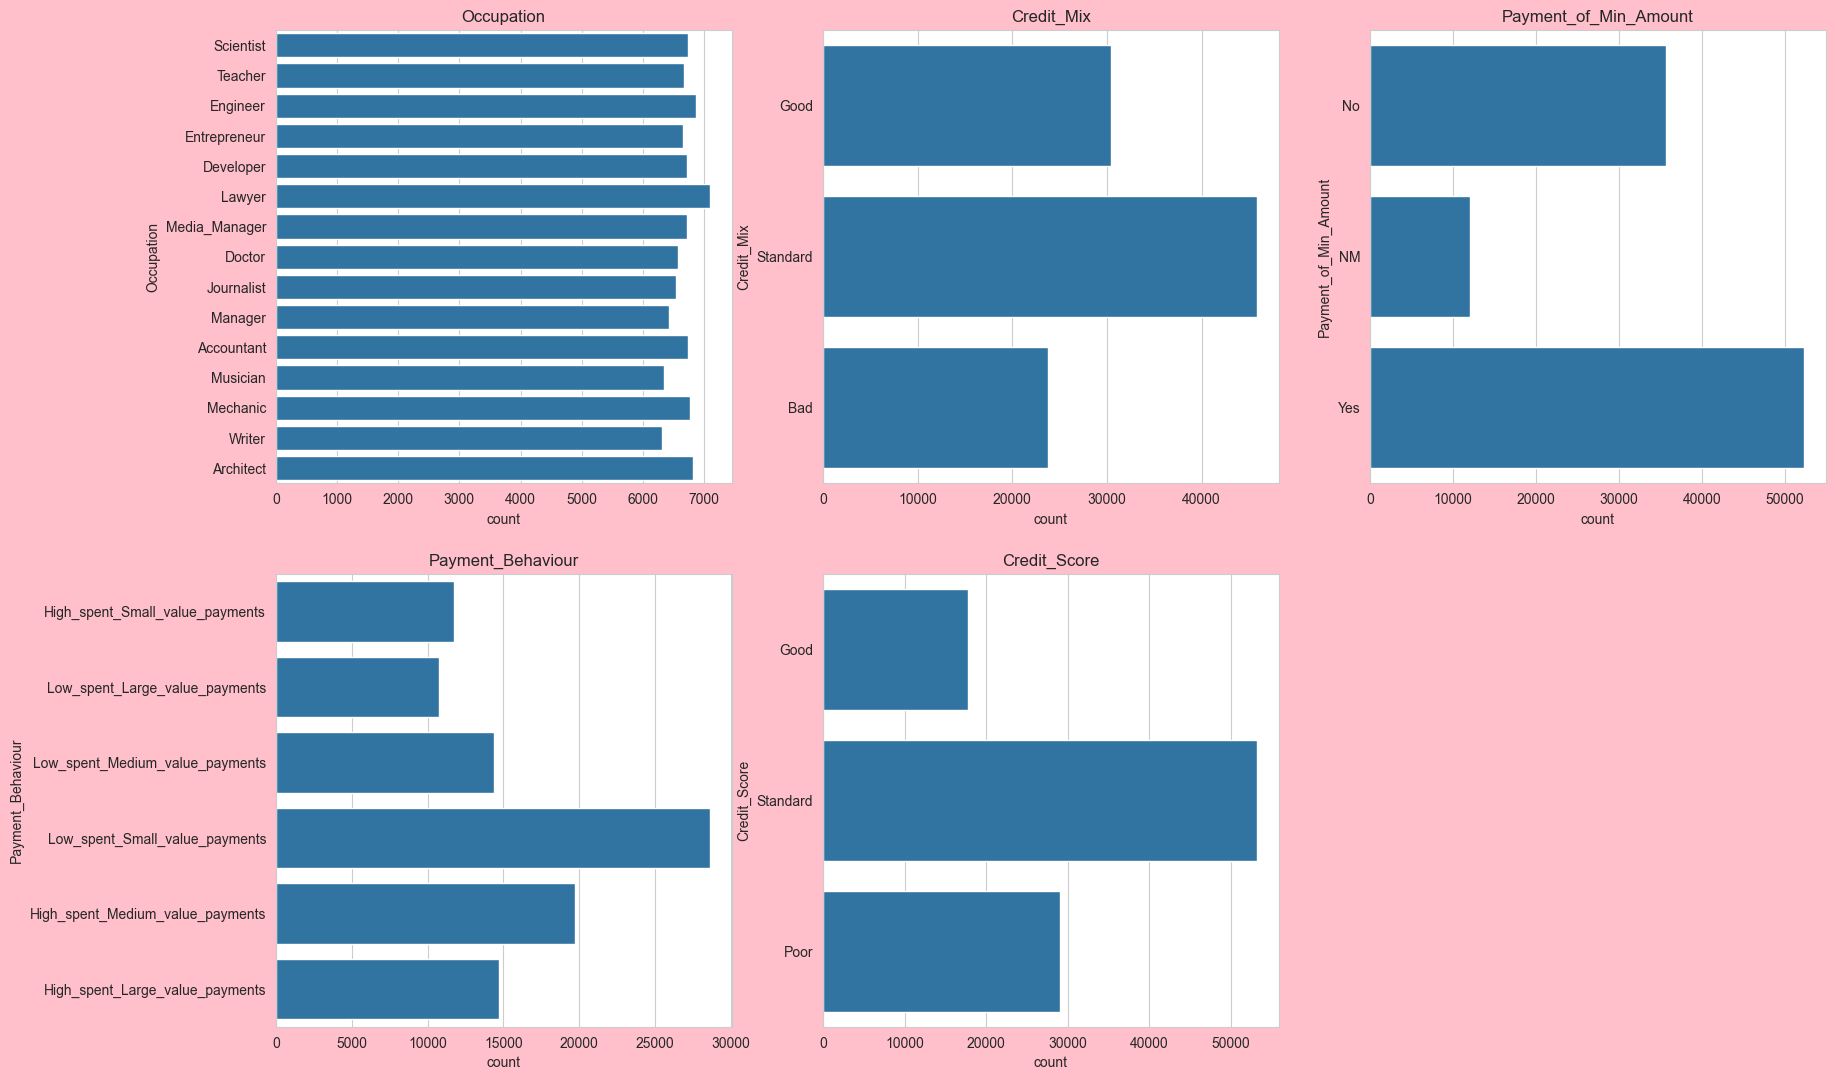

In [133]:
plt.figure(figsize=(20,20),facecolor= 'pink')
plotnumber=1
for feature in categorical_feature:
    plt.subplot(3,3,plotnumber)
    sns.countplot(df[feature])
    plt.title(feature)
    plotnumber+=1

plt.show()

Findings

* The Occupation feature almost equally distributed. heighest will be lawyer.
* In credit mix & credit score Feature standard is distributed largely.
* In payment of min amount, yes is highly distributed.
* In Payment Behaviour low spent_small value payment is higly distributed.

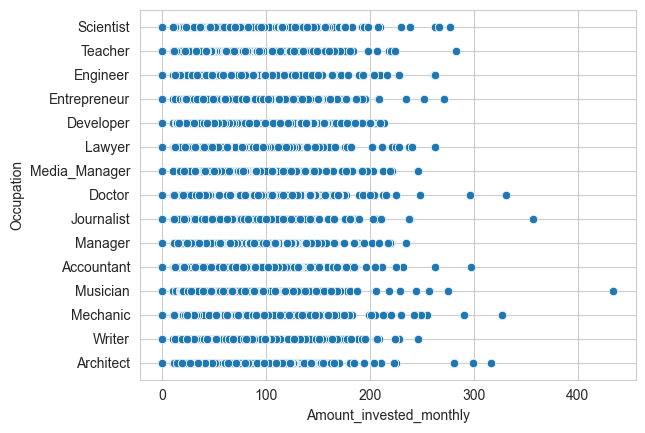

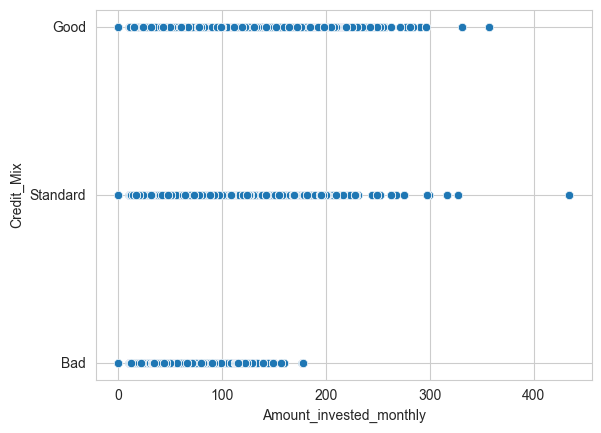

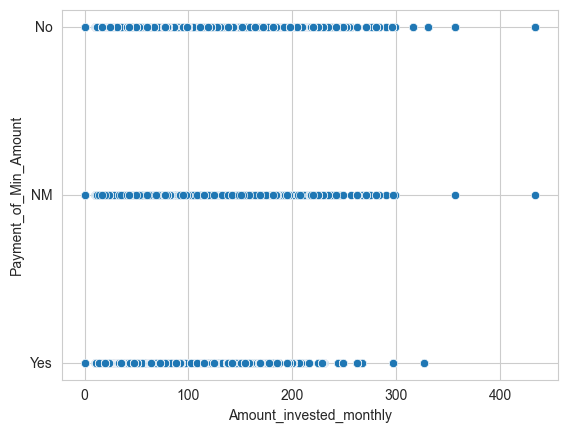

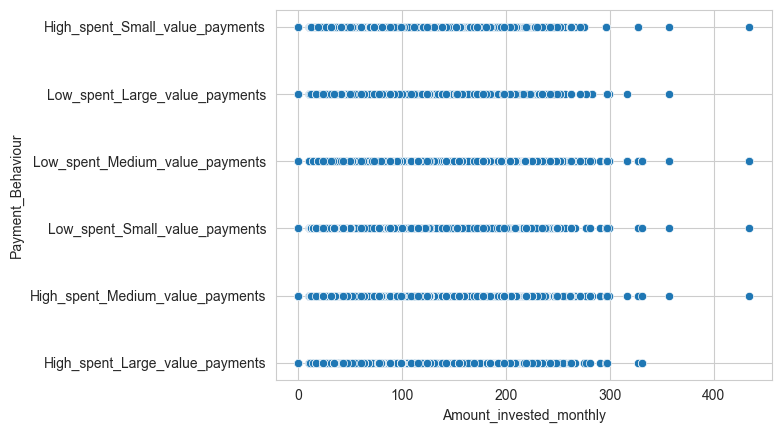

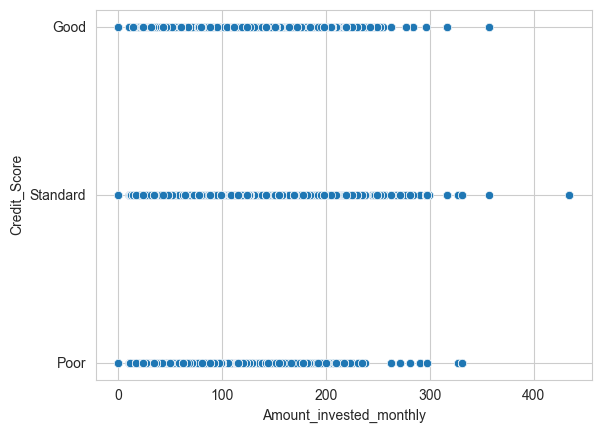

In [136]:
for feature in categorical_feature:
    sns.scatterplot(data=df,x='Amount_invested_monthly',y = feature)
    plt.show()

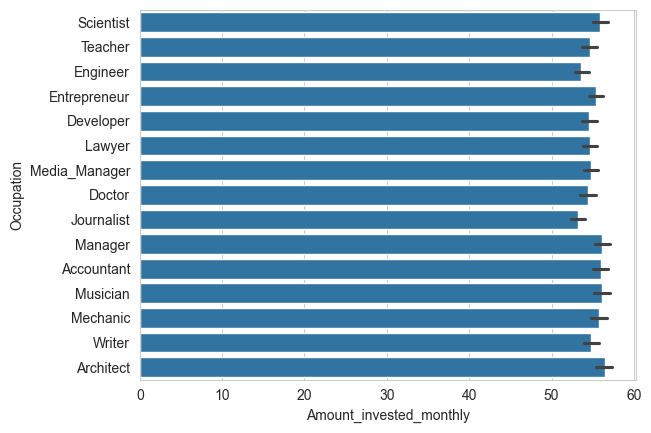

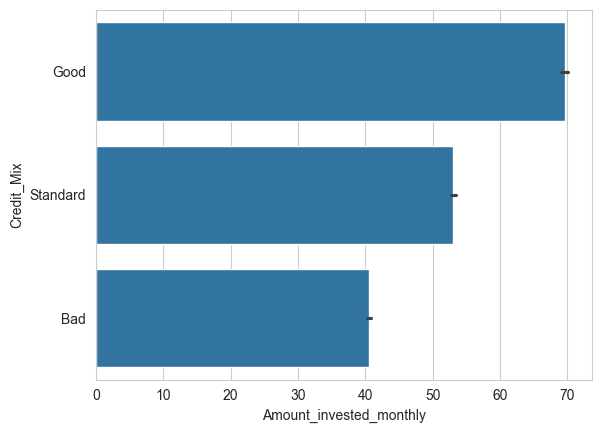

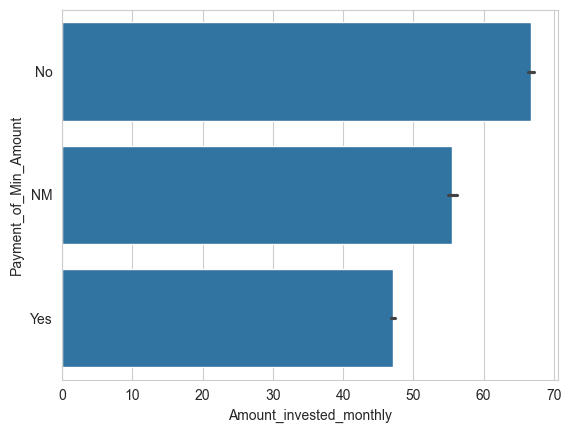

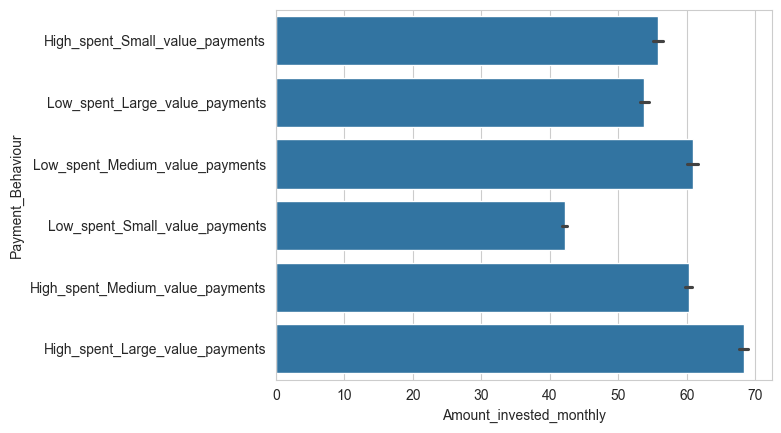

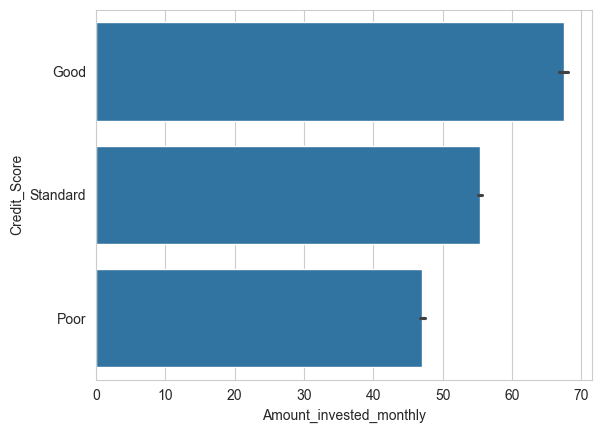

In [83]:
for feature in categorical_feature:
    sns.barplot(data=df,x='Amount_invested_monthly',y = feature)
    plt.show()

##### Findings

* Occupation feature equally investing monthly.
* The person who has good Credit mix and Credit score, investing a lot. who has poor credit mix & score investing minimum.
* The person who pays minimum due not investing properly, only those pay full due payment investing properly.
* In payment Behaviour, Who spend high investing more, low investing low.

# Explore the Numerical feature

In [84]:
numerical_feature = [x for x in df.columns if ((df[x].dtype!='object') & (x!= 'Amount_invested_monthly'))]

In [85]:
numerical_feature

['Month',
 'Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Monthly_Balance']

In [86]:
df[numerical_feature]

,Month,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Monthly_Balance
0,1,23,19114.12,3,4,3,4,3,7,11.27,4,809.98,26.822620,265,49.574949,312.494089
1,2,23,19114.12,3,4,3,4,3,4,11.27,4,809.98,31.944960,266,49.574949,284.629163
2,3,23,19114.12,3,4,3,4,3,7,11.27,4,809.98,28.609352,267,49.574949,331.209863
3,4,23,19114.12,3,4,3,4,5,4,6.27,4,809.98,31.377862,268,49.574949,223.451310
4,5,23,19114.12,3,4,3,4,6,4,11.27,4,809.98,24.797347,269,49.574949,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,39628.99,4,6,7,2,23,7,11.50,3,502.38,34.663572,378,35.104023,479.866228
99996,5,25,39628.99,4,6,7,2,18,7,11.50,3,502.38,40.565631,379,35.104023,496.651610
99997,6,25,39628.99,4,6,7,2,27,6,11.50,3,502.38,41.255522,380,35.104023,516.809083
99998,7,25,39628.99,4,6,7,2,20,6,11.50,3,502.38,33.638208,381,35.104023,319.164979


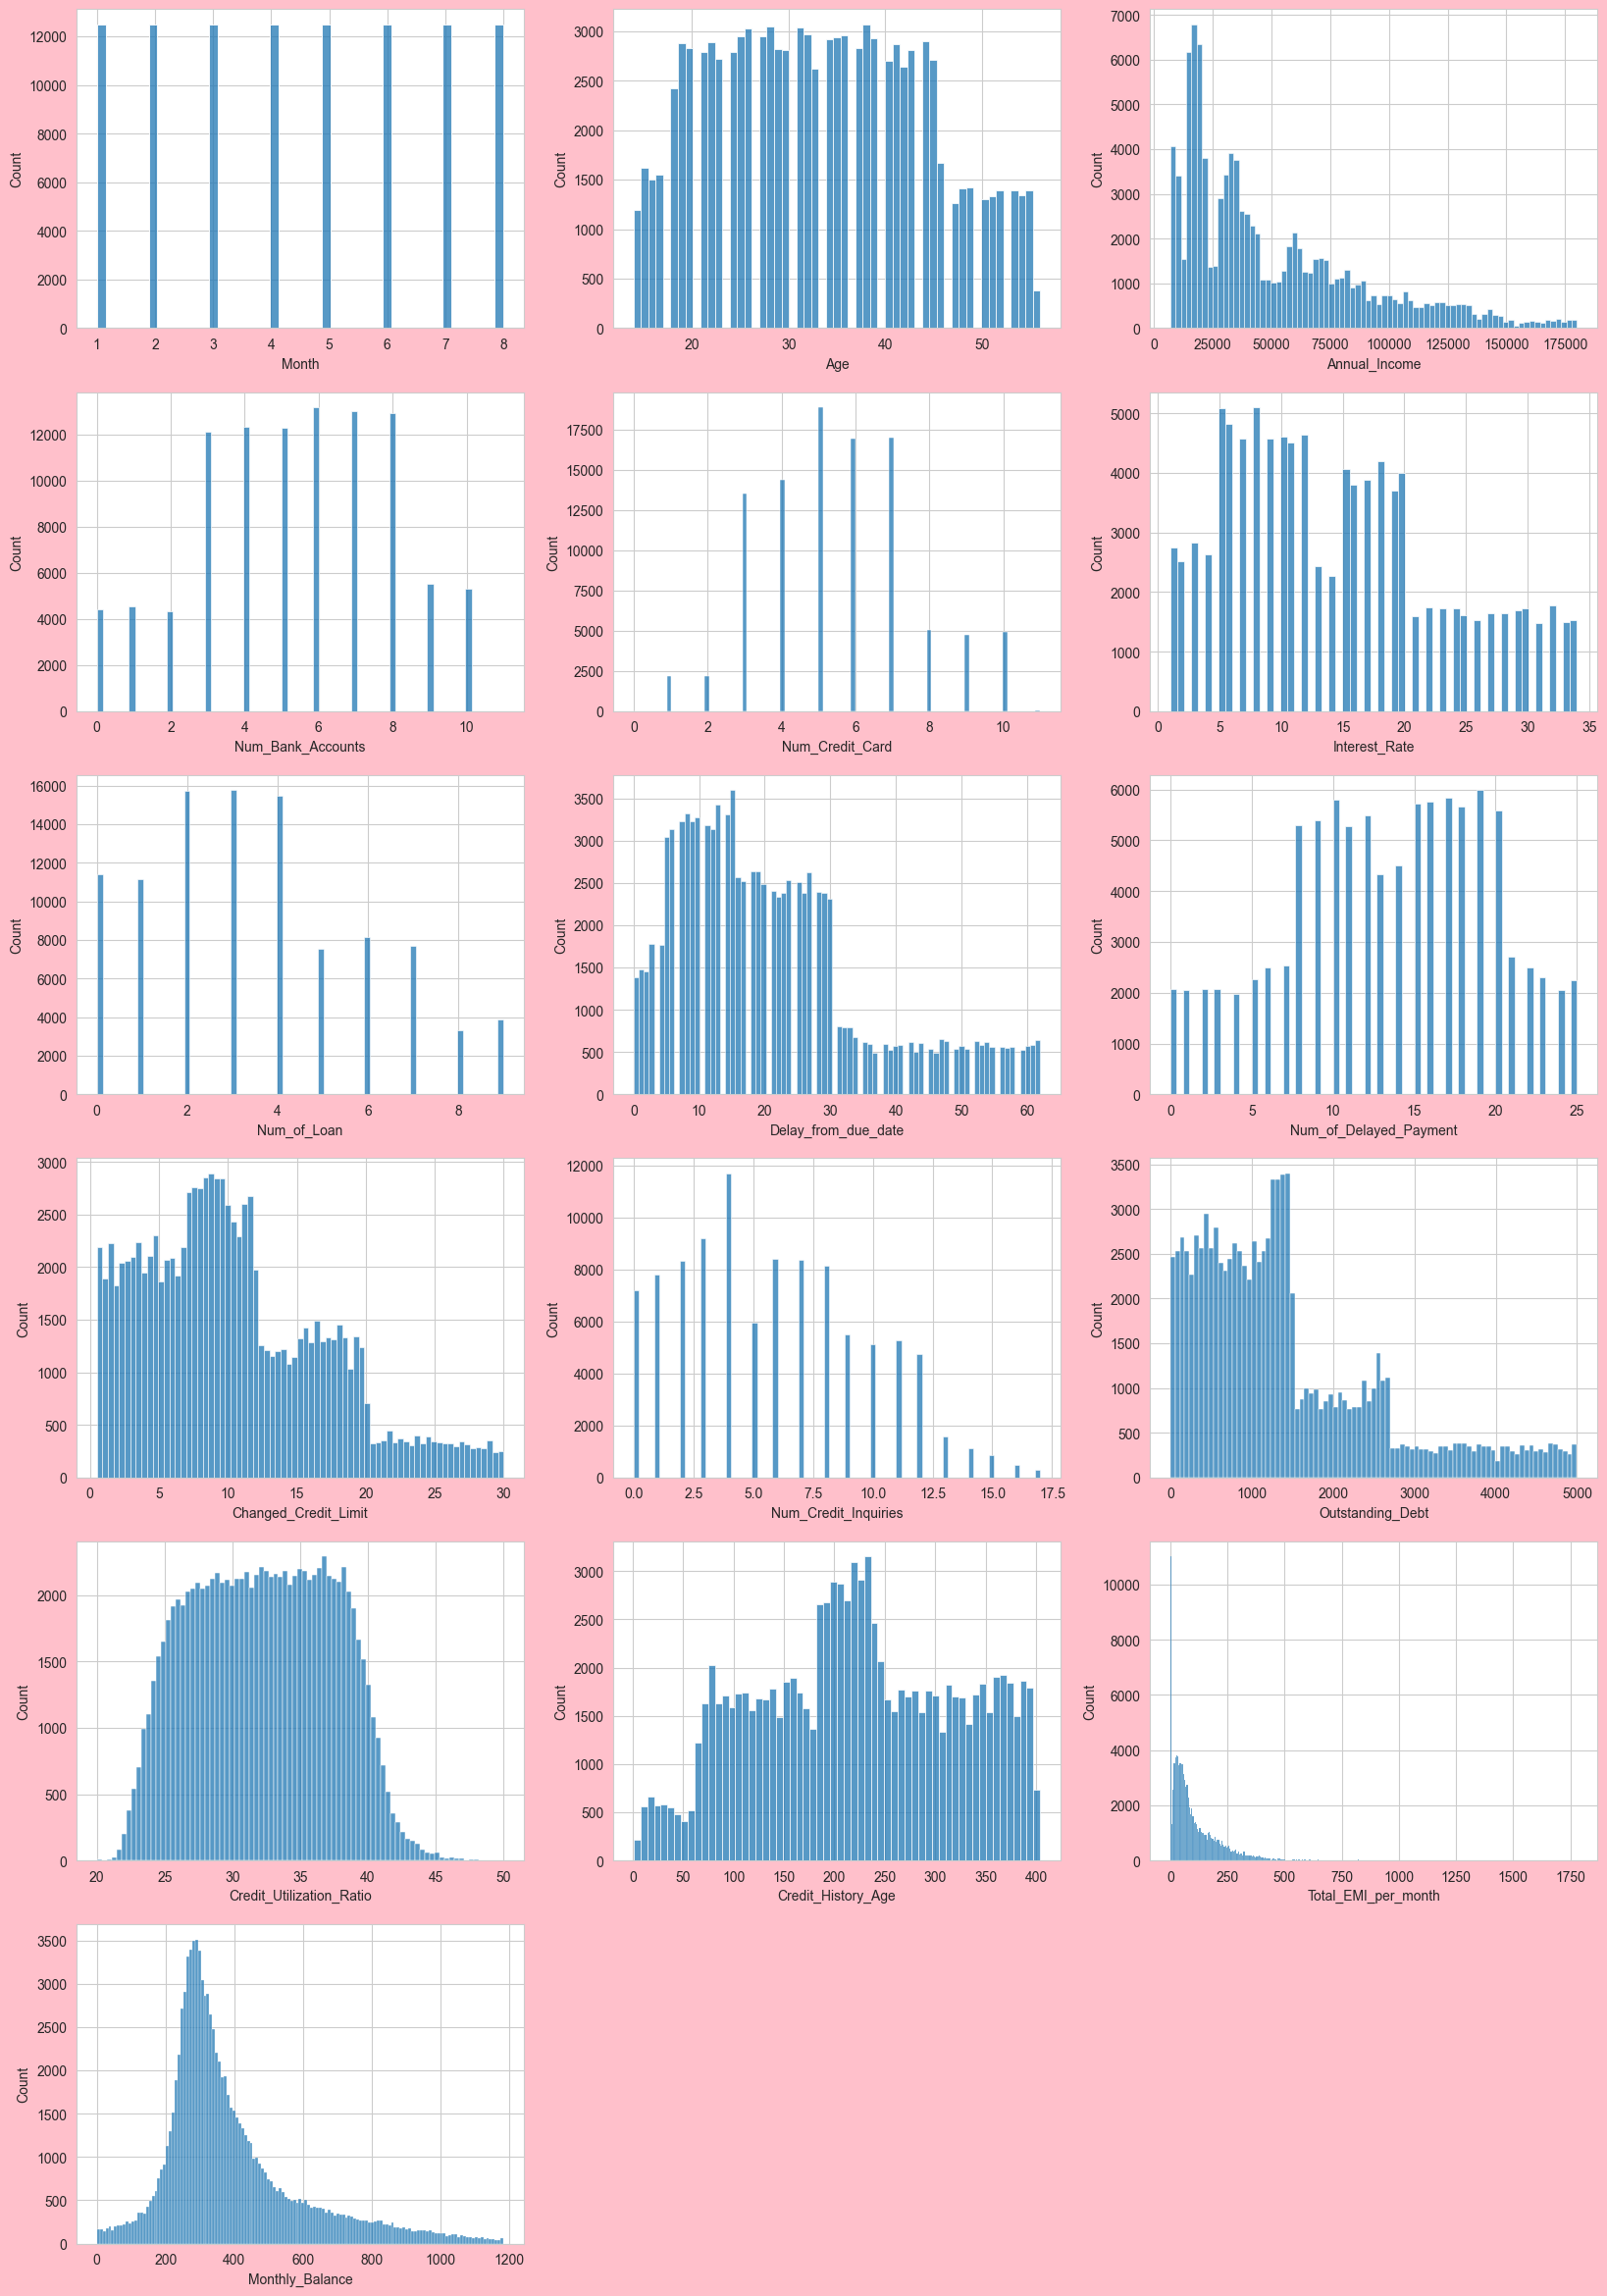

In [87]:
# Distribution of  Numerical features

plt.figure(figsize= (20,60),facecolor='pink')
plotnumber = 1
for feature in numerical_feature:
    plt.subplot(12,3,plotnumber)
    sns.histplot(df[feature])
    plt.xlabel(feature)
    plotnumber = plotnumber+1
plt.show()

There are 17 numerical_feature

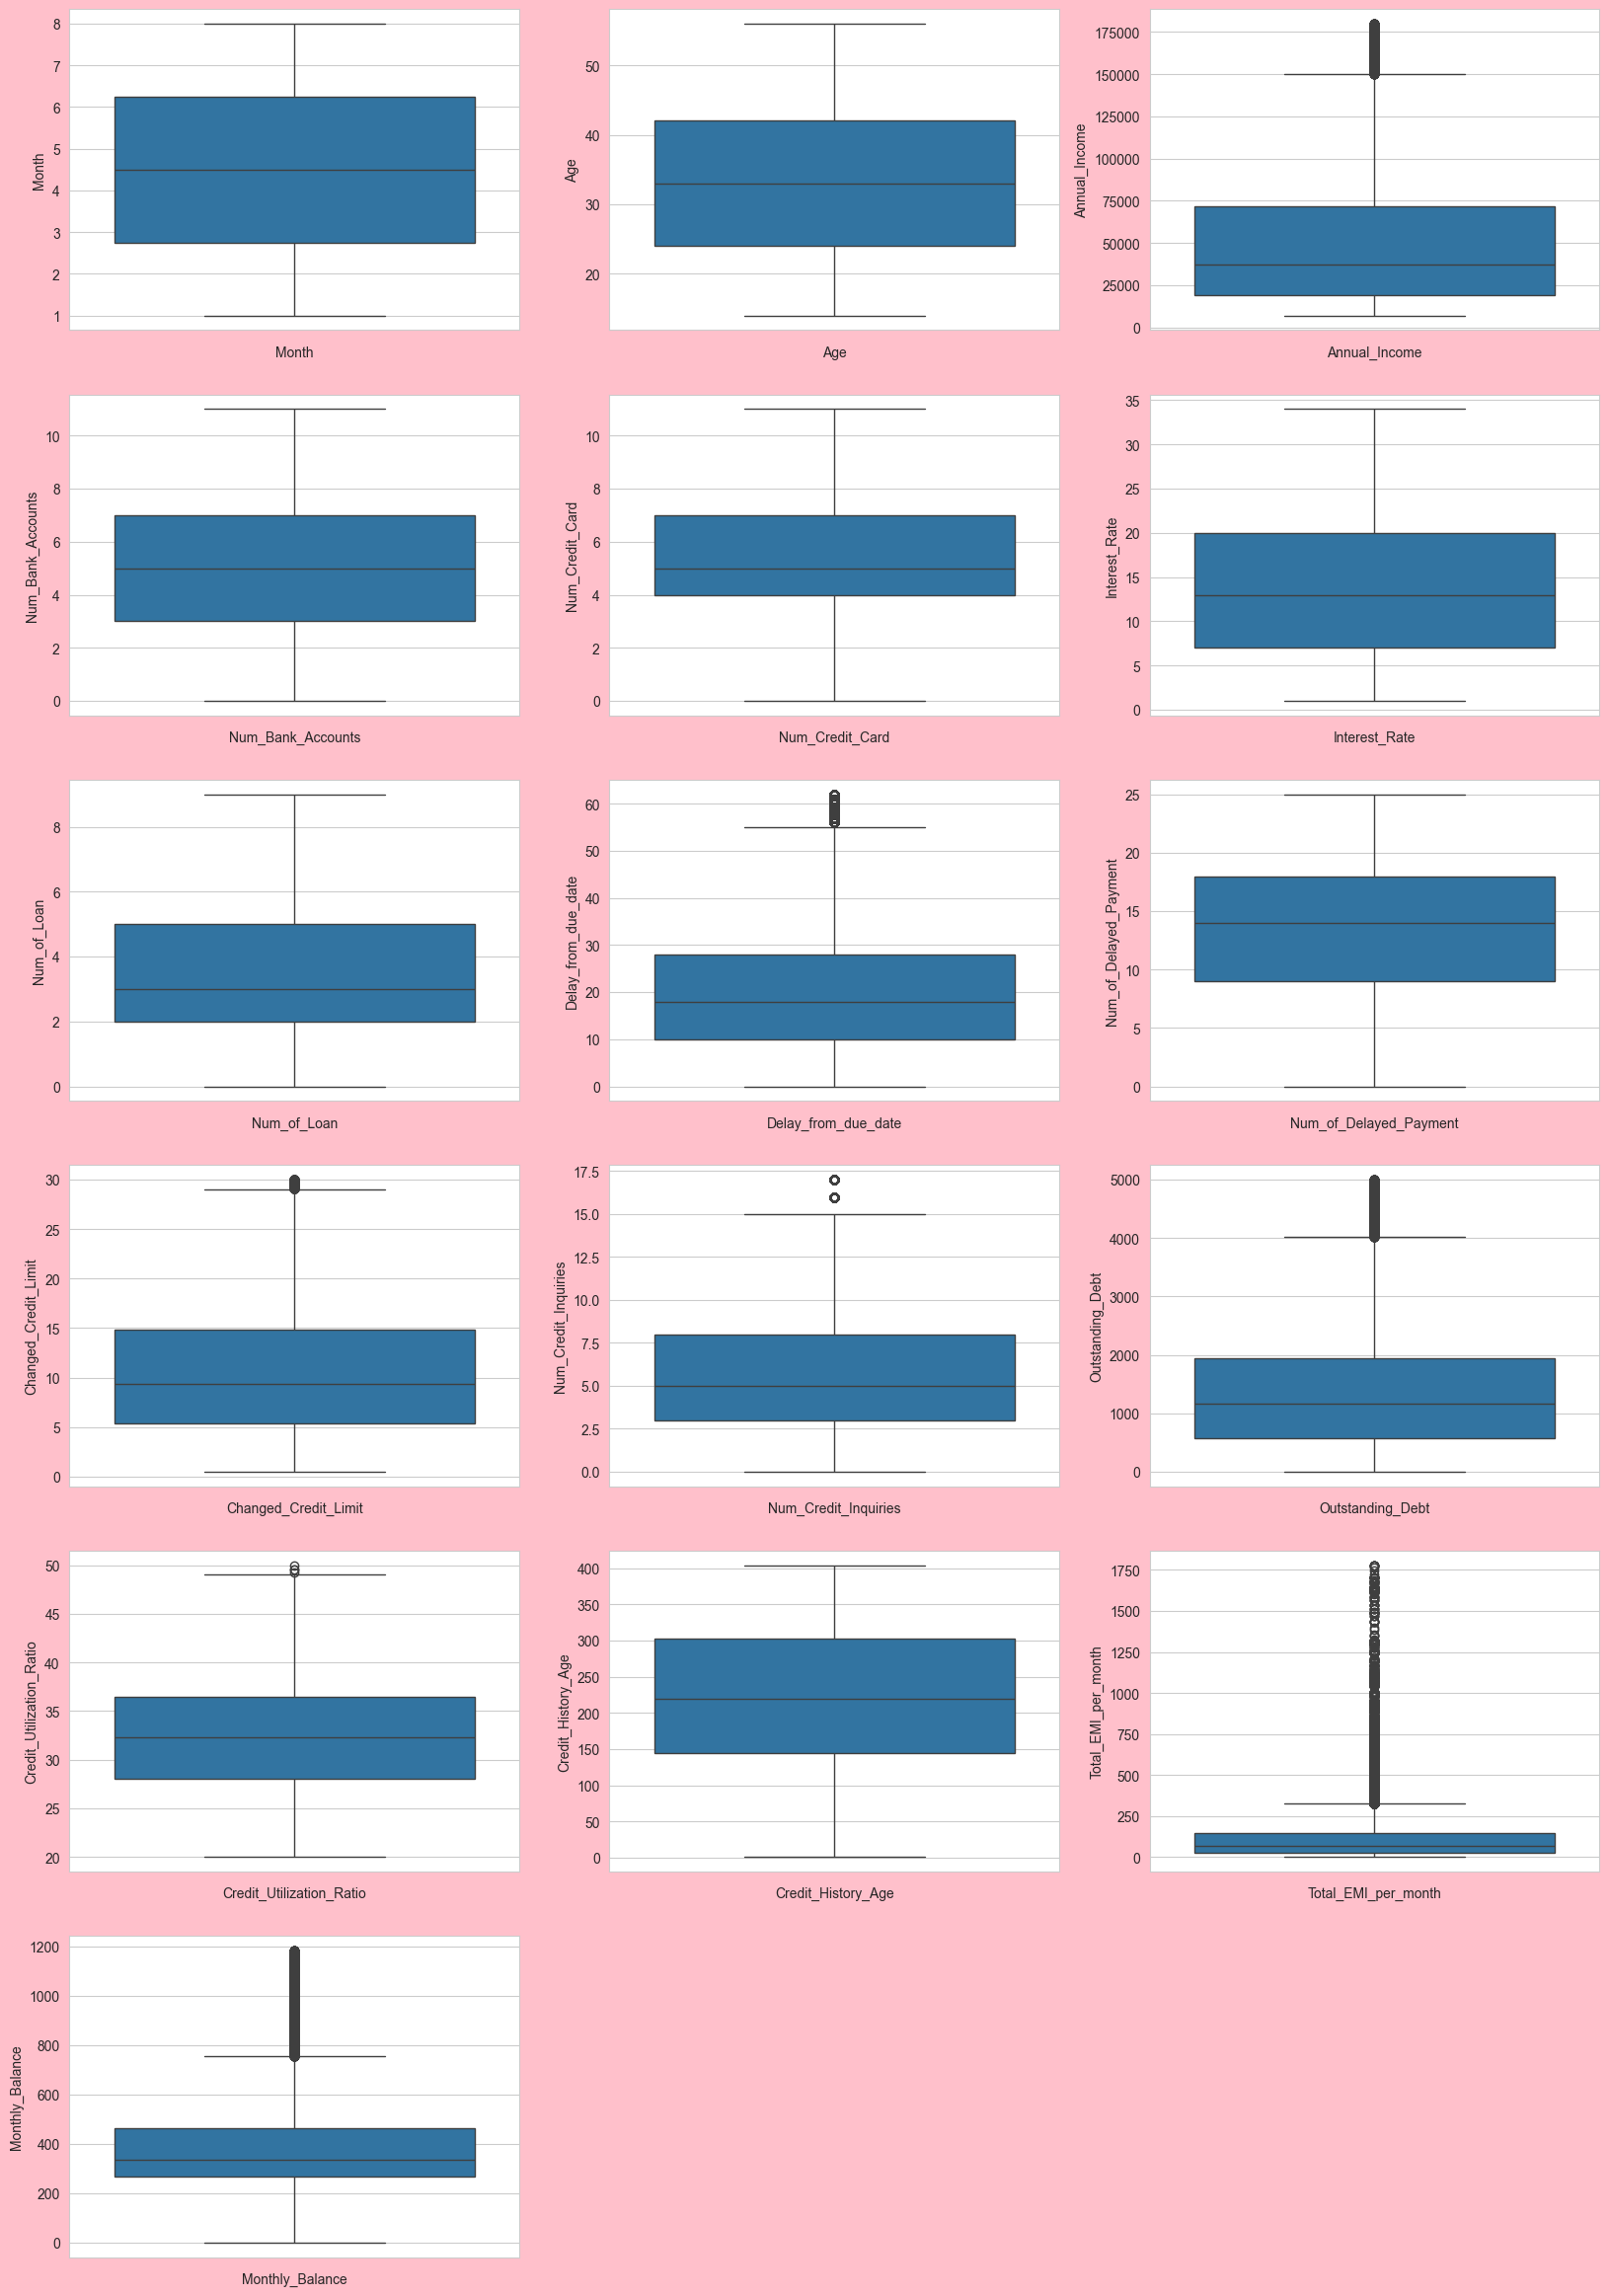

In [88]:
# Find Outliers in numerical features

# boxplot on numerical features to find outliers:

plt.figure(figsize= (20,60),facecolor= 'pink')
plotnumber =1
for feature in numerical_feature:
    plt.subplot(12,3,plotnumber)
    sns.boxplot(df, y =feature)
    plt.xlabel(feature)
    plotnumber = plotnumber+1
plt.show()

Take away:

Annual_income, Monthly inhand salary, delay from due date, changed credit_limit & outstanding debt has some minimum outliers.

Total EMI per month & Monthly balance has huge outliers.



In [89]:
# outlier = []


# def detect_outliers_iqr(data):
#     data = sorted(data)
#     q1 = np.percentile(data, 25)
#     q3 = np.percentile(data, 75)

#     IQR = q3-q1
#     lwr_bound = q1-(1.5*IQR)
#     upr_bound = q3+(1.5*IQR)

#     for i in data:
#         if i<lwr_bound or i>upr_bound:
#             outlier.append(i)
        
#     return outlier

In [90]:
# a =detect_outliers_iqr(df['Outstanding_Debt'])
# len(a)


In [91]:
# 5272/100000*100

#### outliers Treatment


Annual_Income,Monthly_Inhand_Salary has 2 % outliers so we can drop

Delay_from_due_date has 4 %

Changed_Credit_Limit has - 0.5%

Num_Credit_Inquiries - 0.7 %

Outstanding_Debt - 5 %

Credit_Utilization_Ratio - 0.004%

Total_EMI_per_month - 5%

Monthly_Balance - 14 %

respectively


So we can treat all the outliers using IQR Method capping.

In [92]:
outliers_features = ['Annual_Income','Delay_from_due_date','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month','Monthly_Balance']

In [93]:
def detect_outliers_iqr(data):
    
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)


    return [max(min(i, upr_bound), lwr_bound) for i in data]


In [94]:
for i in outliers_features:
    df[i] =detect_outliers_iqr(df[i])

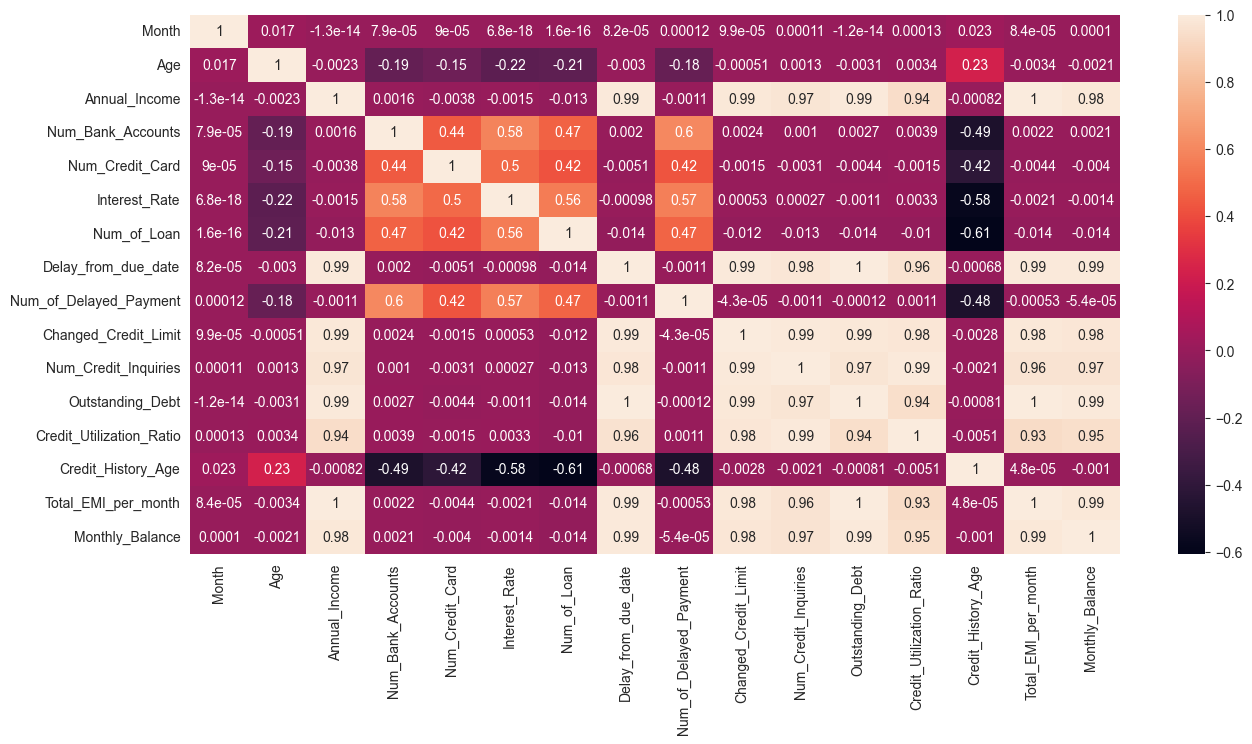

In [95]:
num_feature = df[numerical_feature]

cor_mat = num_feature.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot= True)
plt.show()

# Take away:

in the above correlation heatmap , some of the feature highly depending on other features.

* Annual Income: Correlates with Delay from due date, Changed credit limit, Credit inquiries, Outstanding debt, Credit utilization, EMI per month, Monthly balance.

* Delay from Due Date: Correlates with Annual Income, EMI per month, Changed credit limit, Outstanding debt, Credit inquiries, Credit utilization, Monthly balance.

* Changed Credit Limit: Correlates with Annual Income, Delay from due date, Credit inquiries, Outstanding debt, Credit utilization, EMI per month, Monthly balance.

* Credit Inquiries: Correlates with Annual Income, Delay from due date, Changed credit limit, Outstanding debt, Credit utilization, EMI per month, Monthly balance.

* Outstanding Debt: Correlates with Annual Income, Delay from due date, Changed credit limit, Credit inquiries, Credit utilization, EMI per month, Monthly balance.

* Credit Utilization: Correlates with Annual Income, Delay from due date, Changed credit limit, Credit inquiries, Outstanding debt, EMI per month, Monthly balance.

* EMI per Month: Correlates with Annual Income, Delay from due date, Changed credit limit, Credit inquiries, Outstanding debt, Credit utilization, Monthly balance.

* Monthly Balance: Correlates with Annual Income, Delay from due date, Changed credit limit, Credit inquiries, Outstanding debt, Credit utilization, EMI per month.

#### Creating a Duplicate Dataframe to work further

In [96]:
df1 = df.copy()

df1

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,7005.93000,3,4,3,4,0.0,7,0.500,0.0,Good,0.2300,20.000000,265,No,0.000000,21.465380,High_spent_Small_value_payments,0.007760,Good
1,2,23,Scientist,7005.93000,3,4,3,4,0.0,4,0.500,0.0,Good,0.2300,20.100770,266,No,0.000000,21.465380,Low_spent_Large_value_payments,0.088628,Good
2,3,23,Scientist,7005.93000,3,4,3,4,0.0,7,0.500,0.0,Good,0.2300,20.172942,267,No,0.000000,21.465380,Low_spent_Medium_value_payments,0.095482,Good
3,4,23,Scientist,7005.93000,3,4,3,4,0.0,4,0.500,0.0,Good,0.2300,20.244130,268,No,0.000000,21.465380,Low_spent_Small_value_payments,0.103402,Good
4,5,23,Scientist,7005.93000,3,4,3,4,0.0,4,0.500,0.0,Good,0.2300,20.257073,269,No,0.000000,21.465380,High_spent_Medium_value_payments,0.131136,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,Mechanic,150194.21625,4,6,7,2,55.0,7,29.055,15.5,Good,4015.7975,49.064277,378,No,324.578103,24.028477,High_spent_Large_value_payments,756.615233,Poor
99996,5,25,Mechanic,150194.21625,4,6,7,2,55.0,7,29.055,15.5,Good,4015.7975,49.162808,379,No,324.578103,24.028477,High_spent_Medium_value_payments,756.615233,Poor
99997,6,25,Mechanic,150194.21625,4,6,7,2,55.0,6,29.055,15.5,Good,4015.7975,49.162808,380,No,324.578103,24.028477,High_spent_Large_value_payments,756.615233,Poor
99998,7,25,Mechanic,150194.21625,4,6,7,2,55.0,6,29.055,15.5,Good,4015.7975,49.162808,381,No,324.578103,24.028477,Low_spent_Large_value_payments,756.615233,Standard


# Encoding

In [97]:
categorical_feature

['Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

Categorial Feature - Data Frame

In [98]:
df1[categorical_feature]

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,Good,No,High_spent_Small_value_payments,Good
1,Scientist,Good,No,Low_spent_Large_value_payments,Good
2,Scientist,Good,No,Low_spent_Medium_value_payments,Good
3,Scientist,Good,No,Low_spent_Small_value_payments,Good
4,Scientist,Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,Mechanic,Good,No,High_spent_Large_value_payments,Poor
99996,Mechanic,Good,No,High_spent_Medium_value_payments,Poor
99997,Mechanic,Good,No,High_spent_Large_value_payments,Poor
99998,Mechanic,Good,No,Low_spent_Large_value_payments,Standard


# one_hot_encoding


Nominal data

Occupation has more number of category so we can do one_hot encoding


In [99]:
df1 = pd.concat([df1,pd.get_dummies(df1['Occupation'],prefix='Occupation',dtype = int)],axis=1)
df1.drop(['Occupation'],axis=1,inplace= True)
df1

,Month,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,1,23,7005.93000,3,4,3,4,0.0,7,0.500,0.0,Good,0.2300,20.000000,265,No,0.000000,21.465380,High_spent_Small_value_payments,0.007760,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,23,7005.93000,3,4,3,4,0.0,4,0.500,0.0,Good,0.2300,20.100770,266,No,0.000000,21.465380,Low_spent_Large_value_payments,0.088628,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,23,7005.93000,3,4,3,4,0.0,7,0.500,0.0,Good,0.2300,20.172942,267,No,0.000000,21.465380,Low_spent_Medium_value_payments,0.095482,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,23,7005.93000,3,4,3,4,0.0,4,0.500,0.0,Good,0.2300,20.244130,268,No,0.000000,21.465380,Low_spent_Small_value_payments,0.103402,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,23,7005.93000,3,4,3,4,0.0,4,0.500,0.0,Good,0.2300,20.257073,269,No,0.000000,21.465380,High_spent_Medium_value_payments,0.131136,Good,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,150194.21625,4,6,7,2,55.0,7,29.055,15.5,Good,4015.7975,49.064277,378,No,324.578103,24.028477,High_spent_Large_value_payments,756.615233,Poor,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99996,5,25,150194.21625,4,6,7,2,55.0,7,29.055,15.5,Good,4015.7975,49.162808,379,No,324.578103,24.028477,High_spent_Medium_value_payments,756.615233,Poor,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99997,6,25,150194.21625,4,6,7,2,55.0,6,29.055,15.5,Good,4015.7975,49.162808,380,No,324.578103,24.028477,High_spent_Large_value_payments,756.615233,Poor,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99998,7,25,150194.21625,4,6,7,2,55.0,6,29.055,15.5,Good,4015.7975,49.162808,381,No,324.578103,24.028477,Low_spent_Large_value_payments,756.615233,Standard,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# Label Encoding

Ordinal Data

Credit_Mix, Payment_of_Min_Amount,Payment_Behaviour, Credit_Score has minimal categories, so we can go for Label encoding.


In [100]:
ordinal_Data = [i for i in categorical_feature if i!= 'Occupation']

ordinal_Data

['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

In [101]:
encoder = LabelEncoder()

for i in ordinal_Data:
    df1[i]= encoder.fit_transform(df1[i])
    
    # df1[i] = encoder.transform(df1[i])
df1

,Month,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,1,23,7005.93000,3,4,3,4,0.0,7,0.500,0.0,1,0.2300,20.000000,265,1,0.000000,21.465380,2,0.007760,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,23,7005.93000,3,4,3,4,0.0,4,0.500,0.0,1,0.2300,20.100770,266,1,0.000000,21.465380,3,0.088628,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,23,7005.93000,3,4,3,4,0.0,7,0.500,0.0,1,0.2300,20.172942,267,1,0.000000,21.465380,4,0.095482,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,23,7005.93000,3,4,3,4,0.0,4,0.500,0.0,1,0.2300,20.244130,268,1,0.000000,21.465380,5,0.103402,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,23,7005.93000,3,4,3,4,0.0,4,0.500,0.0,1,0.2300,20.257073,269,1,0.000000,21.465380,1,0.131136,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,150194.21625,4,6,7,2,55.0,7,29.055,15.5,1,4015.7975,49.064277,378,1,324.578103,24.028477,0,756.615233,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99996,5,25,150194.21625,4,6,7,2,55.0,7,29.055,15.5,1,4015.7975,49.162808,379,1,324.578103,24.028477,1,756.615233,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99997,6,25,150194.21625,4,6,7,2,55.0,6,29.055,15.5,1,4015.7975,49.162808,380,1,324.578103,24.028477,0,756.615233,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99998,7,25,150194.21625,4,6,7,2,55.0,6,29.055,15.5,1,4015.7975,49.162808,381,1,324.578103,24.028477,3,756.615233,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


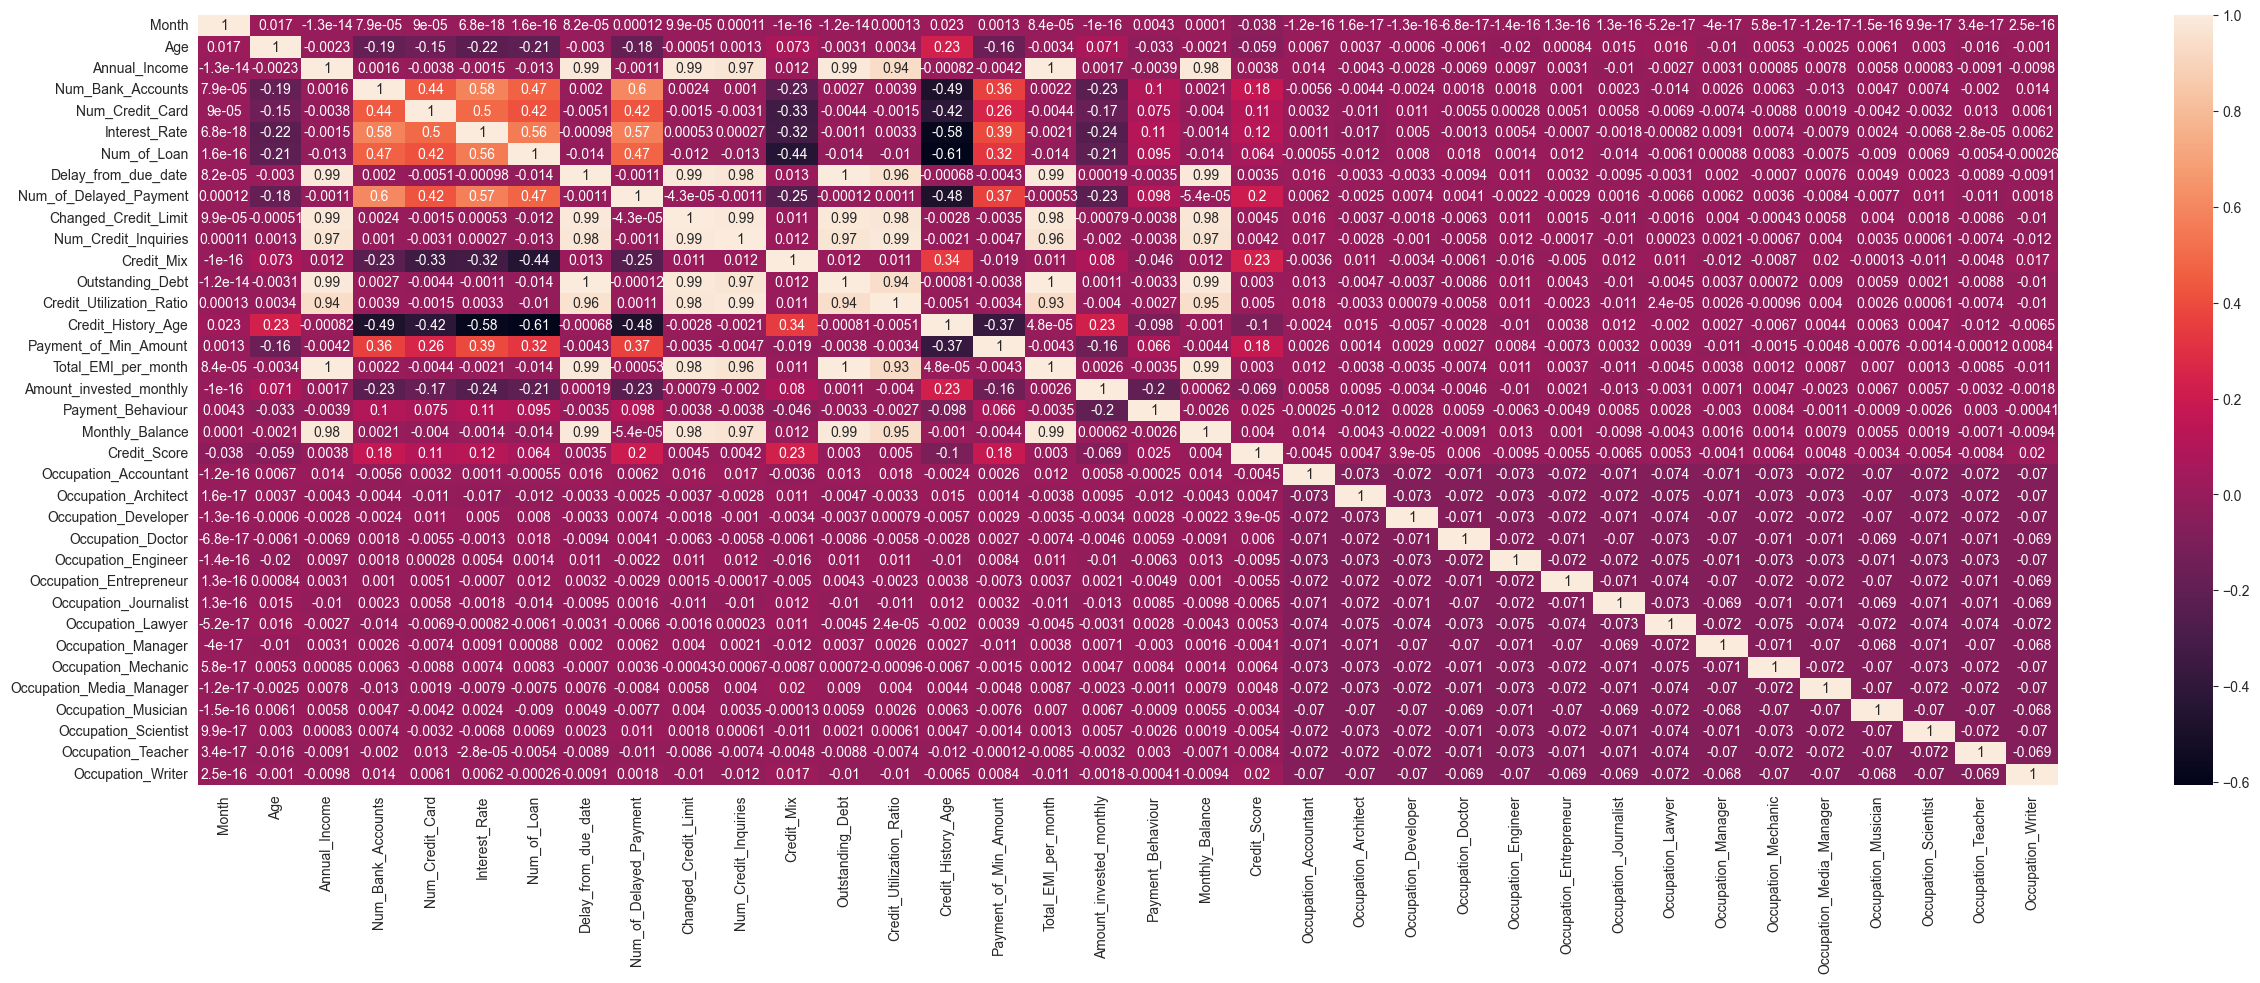

In [102]:
feature = df1

cor_mat = feature.corr()
fig = plt.figure(figsize=(30,10))
sns.heatmap(cor_mat,annot= True)
plt.show()

In [103]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [104]:
df_neww = correlation(df1, 0.9)

In [105]:
df_neww 

{'Changed_Credit_Limit',
 'Credit_Utilization_Ratio',
 'Delay_from_due_date',
 'Monthly_Balance',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Total_EMI_per_month'}

In [106]:
df2 = df1.drop(df_neww,axis=1) 


# Separating input and output feature

In [107]:
## Input feature

feature = df2.drop('Amount_invested_monthly',axis = 1)

## Target

target = df2['Amount_invested_monthly']

### determine the mutual information

In [108]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(feature, target)
mutual_info


array([0.        , 2.99317405, 9.27748537, 2.23954039, 2.0199529 ,
       3.36340483, 2.15440799, 1.79827718, 1.04289372, 0.1398309 ,
       0.58812548, 0.17378933, 0.6187362 , 0.24246511, 0.24153596,
       0.2390683 , 0.23708652, 0.24610104, 0.24047414, 0.23569563,
       0.25095838, 0.2334479 , 0.24344687, 0.24019166, 0.23310135,
       0.24419861, 0.23930732, 0.22982275])

In [109]:
mutual_info = pd.Series(mutual_info)

mutual_info.index = feature.columns

mutual_info.sort_values(ascending= False)

Annual_Income               9.277485
Interest_Rate               3.363405
Age                         2.993174
Num_Bank_Accounts           2.239540
Num_of_Loan                 2.154408
Num_Credit_Card             2.019953
Num_of_Delayed_Payment      1.798277
Credit_Mix                  1.042894
Credit_Score                0.618736
Payment_of_Min_Amount       0.588125
Occupation_Lawyer           0.250958
Occupation_Engineer         0.246101
Occupation_Scientist        0.244199
Occupation_Mechanic         0.243447
Occupation_Accountant       0.242465
Occupation_Architect        0.241536
Occupation_Entrepreneur     0.240474
Occupation_Media_Manager    0.240192
Occupation_Teacher          0.239307
Occupation_Developer        0.239068
Occupation_Doctor           0.237087
Occupation_Journalist       0.235696
Occupation_Manager          0.233448
Occupation_Musician         0.233101
Occupation_Writer           0.229823
Payment_Behaviour           0.173789
Credit_History_Age          0.139831
M

### Selecting the top 10 features for both test and Training 

In [110]:
from sklearn.feature_selection import SelectKBest

selected_top_columns = SelectKBest(mutual_info_regression, k=10)
selected_top_columns.fit(feature, target)

SelectKBest(score_func=<function mutual_info_regression at 0x000001B2E75AF880>)

In [111]:
a = list(feature.columns[selected_top_columns.get_support()])
a

['Age',
 'Annual_Income',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Credit_Score']

In [112]:
feature_new = feature.copy()


for i in feature_new.columns:
   if i not in a:
      feature_new.drop(i,axis = 1,inplace= True)
feature_new

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,23,7005.93000,3,4,3,4,7,1,1,0
1,23,7005.93000,3,4,3,4,4,1,1,0
2,23,7005.93000,3,4,3,4,7,1,1,0
3,23,7005.93000,3,4,3,4,4,1,1,0
4,23,7005.93000,3,4,3,4,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,25,150194.21625,4,6,7,2,7,1,1,1
99996,25,150194.21625,4,6,7,2,7,1,1,1
99997,25,150194.21625,4,6,7,2,6,1,1,1
99998,25,150194.21625,4,6,7,2,6,1,1,2


In [113]:
# Save the column names
column_names = feature_new.columns

In [114]:
from sklearn.preprocessing import StandardScaler

## Initialisation

scaler = StandardScaler()


#Scaling 

feature_new = scaler.fit_transform(feature_new)

feature_new_df = pd.DataFrame(feature_new, columns=column_names)

feature_new_df


,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,-0.958344,-1.155395,-0.913438,-0.741899,-1.319266,0.190946,-1.012183,-0.274417,-0.58149,-1.769439
1,-0.958344,-1.155395,-0.913438,-0.741899,-1.319266,0.190946,-1.493173,-0.274417,-0.58149,-1.769439
2,-0.958344,-1.155395,-0.913438,-0.741899,-1.319266,0.190946,-1.012183,-0.274417,-0.58149,-1.769439
3,-0.958344,-1.155395,-0.913438,-0.741899,-1.319266,0.190946,-1.493173,-0.274417,-0.58149,-1.769439
4,-0.958344,-1.155395,-0.913438,-0.741899,-1.319266,0.190946,-1.493173,-0.274417,-0.58149,-1.769439
...,...,...,...,...,...,...,...,...,...,...
99995,-0.772552,2.675892,-0.527829,0.225646,-0.861667,-0.626600,-1.012183,-0.274417,-0.58149,-0.462094
99996,-0.772552,2.675892,-0.527829,0.225646,-0.861667,-0.626600,-1.012183,-0.274417,-0.58149,-0.462094
99997,-0.772552,2.675892,-0.527829,0.225646,-0.861667,-0.626600,-1.172513,-0.274417,-0.58149,-0.462094
99998,-0.772552,2.675892,-0.527829,0.225646,-0.861667,-0.626600,-1.172513,-0.274417,-0.58149,0.845251


### Input Feature

In [115]:
## Input feature

final_feature = feature_new_df

## Target

target = df2['Amount_invested_monthly']


### Train Test Split

In [116]:
## Train Test Split

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(feature_new_df, target, test_size=0.2, random_state=42)

### Random forest Regressor

In [117]:
# Train a Random Forest regression model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error

rf = RandomForestRegressor(n_estimators= 100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [118]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [119]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"root_mean_squared_error:{rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 65.44863202806292
Mean Absolute Error: 3.465253645978603
root_mean_squared_error:8.090032881766485
R^2 Score: 0.9573148654643654


### Decision Tree Regressor

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error

In [120]:
# Train a Random Forest regression model

from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [121]:
# Make predictions on the test set
y_pred = dt.predict(X_test)

In [122]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"root_mean_squared_error:{rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 224.23914412901811
Mean Absolute Error: 2.970582943453501
root_mean_squared_error:14.974616660503136
R^2 Score: 0.8537528174584523


## KNN Regression

In [123]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [124]:
# Train a KNN regression model

from sklearn.neighbors import KNeighborsRegressor


kn= KNeighborsRegressor()
kn.fit(X_train, y_train)

KNeighborsRegressor()

In [125]:
# Make predictions on the test set
y_pred = kn.predict(X_test)

In [126]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"root_mean_squared_error:{rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 591.9514808043783
Mean Absolute Error: 13.604517263139499
root_mean_squared_error:24.330053037434553
R^2 Score: 0.613933434302051


### ExtraTreesRegressor

In [127]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [129]:
# Train a ExtraTreesRegressor model

from sklearn.ensemble import ExtraTreesRegressor

et= ExtraTreesRegressor(n_estimators = 100,random_state=42)
et.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [130]:
# Make predictions on the test set
y_pred = et.predict(X_test)

In [131]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"root_mean_squared_error:{rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 105.76553324893742
Mean Absolute Error: 3.979152192083077
root_mean_squared_error:10.284237125277569
R^2 Score: 0.9310204678681708


## Hyperparameter Tuning

In [132]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200, 300],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }


# # Instantiate the GridSearchCV object
# rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid,
#                        cv=5, verbose=2, n_jobs=-1)


# rf_grid.fit(X_train, y_train)


# # Get the best parameters
# print(f"Best parameters: {rf_grid.best_params_}")

# # Train the best model
# best_rf = rf_grid.best_estimator_


# # Make predictions and evaluate the best model
# y_pred_best = best_rf.predict(X_test)
# mse_best = mean_squared_error(y_test, y_pred)
# mae_best = mean_absolute_error(y_test, y_pred)
# rmse = root_mean_squared_error(y_test, y_pred)
# r2_best = r2_score(y_test, y_pred)

# print(f"Best Mean Squared Error: {mse_best}")
# print(f"Best Mean Absolute Error: {mae_best}")
# print(f"root_mean_squared_error:{rmse}")
# print(f"Best R^2 Score: {r2_best}")